In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_parquet("all_teams_last10seasons_with_opponent_rolls.parquet")

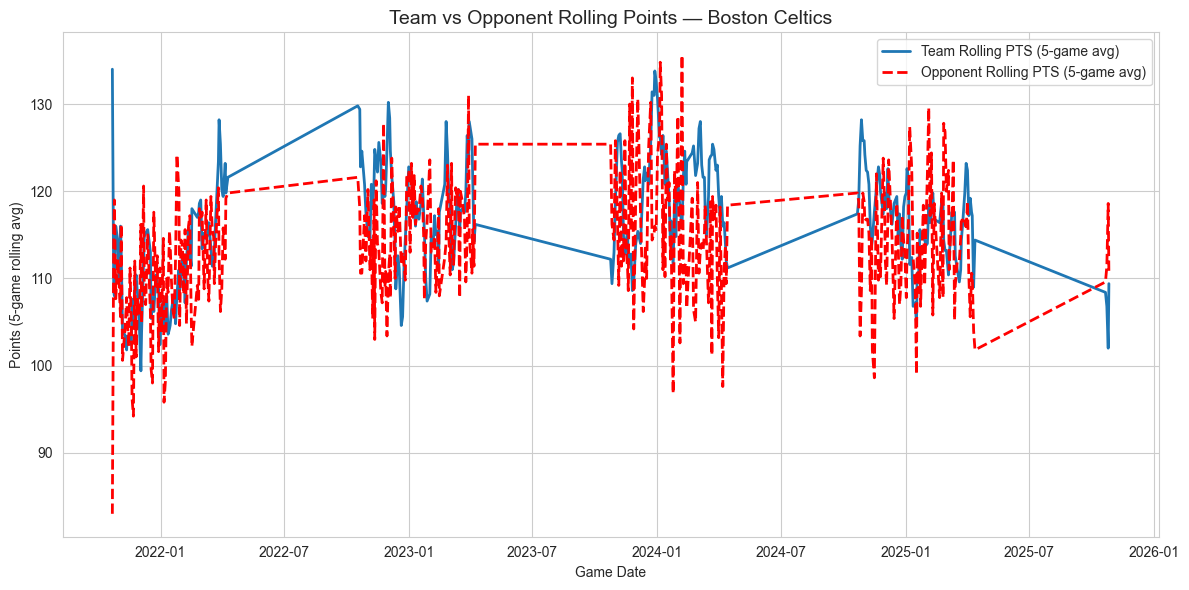

In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_parquet("all_teams_last10seasons_with_opponent_rolls.parquet")

# Example: team_id for the Boston Celtics
team_id = 1610612738  

# ✅ FIX: You were referencing 'merged' instead of 'df'
team_df = df[df['Team_ID'] == team_id].sort_values('GAME_DATE')

# If GAME_DATE is a string, convert to datetime for better plotting
team_df['GAME_DATE'] = pd.to_datetime(team_df['GAME_DATE'])

# --- Plot setup ---
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

# Plot team’s 5-game rolling points
plt.plot(
    team_df['GAME_DATE'], 
    team_df['PTS_rolling5'], 
    label='Team Rolling PTS (5-game avg)', 
    linewidth=2
)

# Plot opponents’ 5-game rolling points
plt.plot(
    team_df['GAME_DATE'], 
    team_df['PTS_rolling5_opp'], 
    label='Opponent Rolling PTS (5-game avg)', 
    linewidth=2, 
    linestyle='--', 
    color='red'
)

plt.title("Team vs Opponent Rolling Points — Boston Celtics", fontsize=14)
plt.xlabel("Game Date")
plt.ylabel("Points (5-game rolling avg)")
plt.legend()
plt.tight_layout()
plt.show()


<Axes: xlabel='TARGET_WL', ylabel='count'>

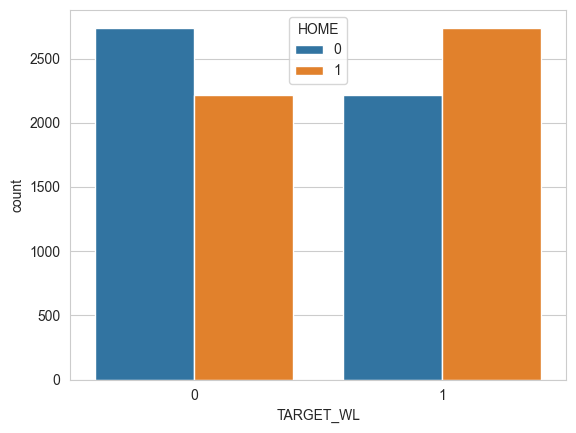

In [14]:
sns.countplot(x='TARGET_WL', hue='HOME', data=df)

<Axes: xlabel='PTS_rolling5', ylabel='PTS_rolling5_opp'>

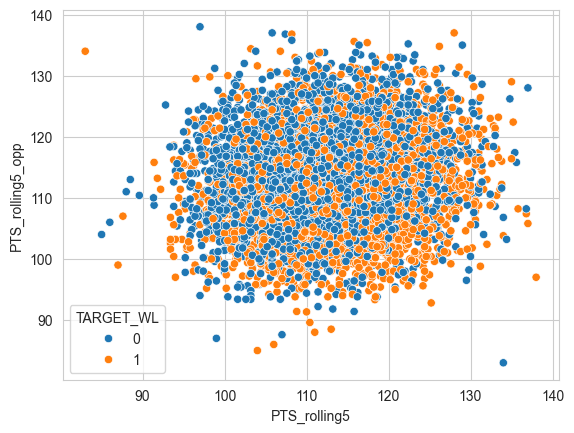

In [18]:
sns.scatterplot(x='PTS_rolling5', y='PTS_rolling5_opp', hue='TARGET_WL', data=df)

In [48]:
df.columns

Index(['Team_ID', 'Game_ID', 'GAME_DATE', 'TARGET_WL', 'HOME',
       'TEAM_LAST10_WINS', 'FGA_rolling5', 'FG_PCT_rolling5', 'FG3A_rolling5',
       'FG3_PCT_rolling5', 'FTA_rolling5', 'FT_PCT_rolling5', 'OREB_rolling5',
       'DREB_rolling5', 'AST_rolling5', 'STL_rolling5', 'BLK_rolling5',
       'TOV_rolling5', 'PF_rolling5', 'PTS_rolling5', 'Team_ID_opp',
       'TEAM_LAST10_WINS_opp', 'FGA_rolling5_opp', 'FG_PCT_rolling5_opp',
       'FG3A_rolling5_opp', 'FG3_PCT_rolling5_opp', 'FTA_rolling5_opp',
       'FT_PCT_rolling5_opp', 'OREB_rolling5_opp', 'DREB_rolling5_opp',
       'AST_rolling5_opp', 'STL_rolling5_opp', 'BLK_rolling5_opp',
       'TOV_rolling5_opp', 'PF_rolling5_opp', 'PTS_rolling5_opp'],
      dtype='object')

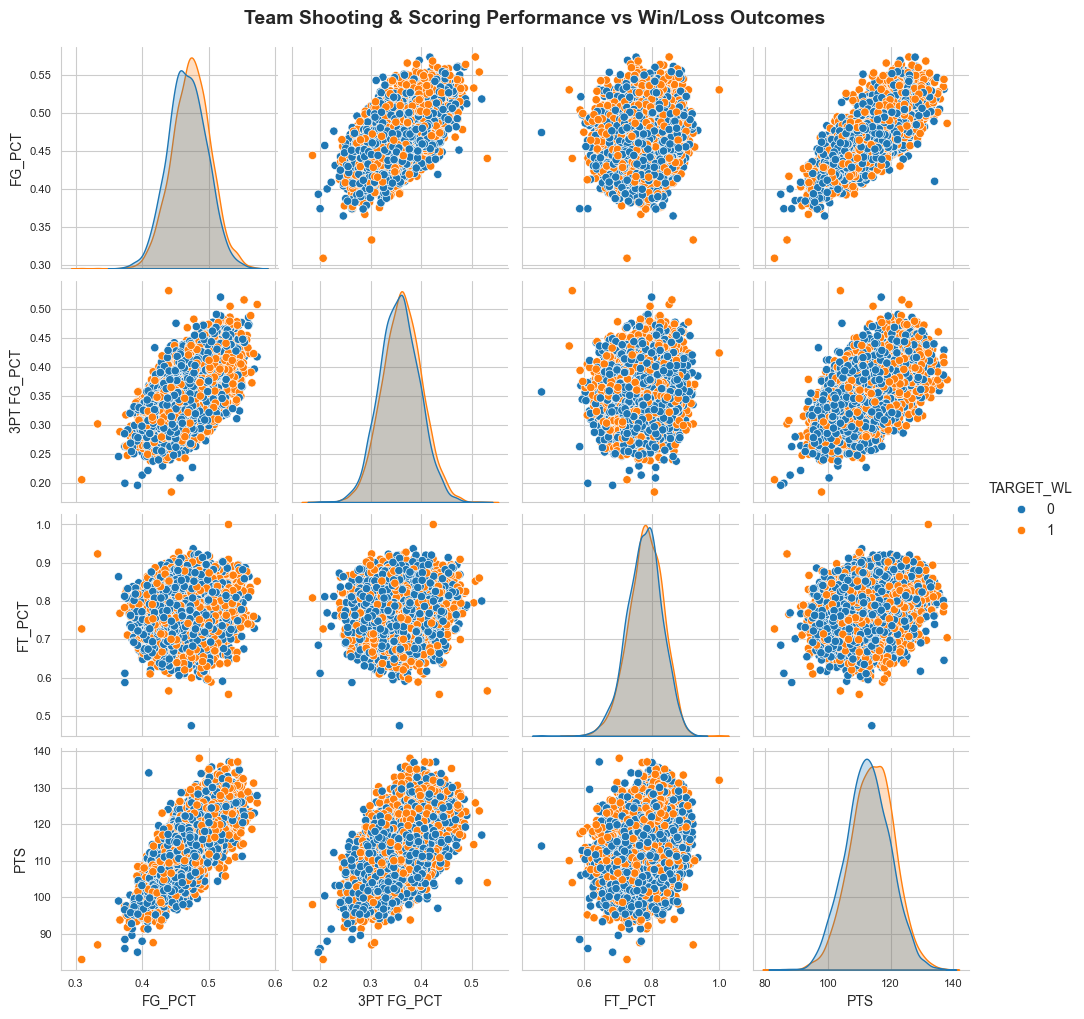

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the pairplot
g = sns.pairplot(
    df,
    vars=['FG_PCT_rolling5', 'FG3_PCT_rolling5', 'FT_PCT_rolling5', 'PTS_rolling5'],
    hue='TARGET_WL',
    diag_kind='kde',
)

# Add a main title
g.fig.suptitle("Team Shooting & Scoring Performance vs Win/Loss Outcomes", 
               fontsize=14, fontweight='bold', y=1.02)

# Adjust axis labels for readability
for ax in g.axes.flatten():
    if ax is not None:  # skip empty plots (like upper triangle if corner=True)
        ax.set_xlabel(ax.get_xlabel().replace('_rolling5', '').replace('FG3', '3PT FG'), fontsize=10)
        ax.set_ylabel(ax.get_ylabel().replace('_rolling5', '').replace('FG3', '3PT FG'), fontsize=10)
        ax.tick_params(axis='both', labelsize=8)

# Show plot
plt.show()


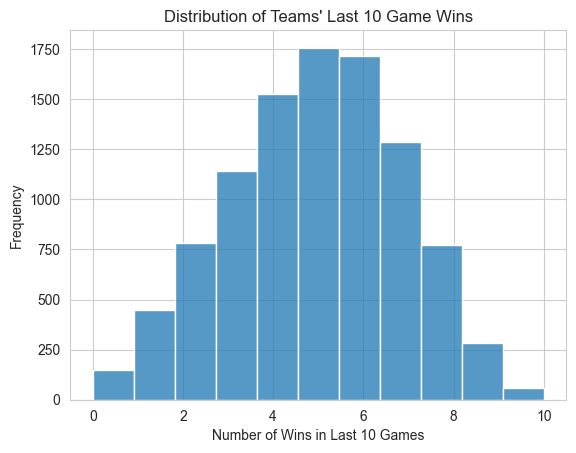

In [47]:
sns.histplot(df['TEAM_LAST10_WINS'], bins=11, kde=False)
plt.xlabel("Number of Wins in Last 10 Games")  # <-- Change this text
plt.ylabel("Frequency")  # optional
plt.title("Distribution of Teams' Last 10 Game Wins")  # optional
plt.show()

<Axes: xlabel='HOME', ylabel='PTS_rolling5'>

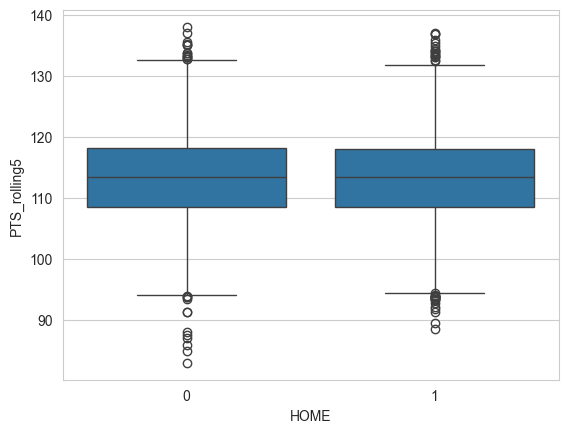

In [28]:
sns.boxplot(x='HOME', y='PTS_rolling5', data=df)


<Axes: xlabel='PTS_rolling5_opp', ylabel='TARGET_WL'>

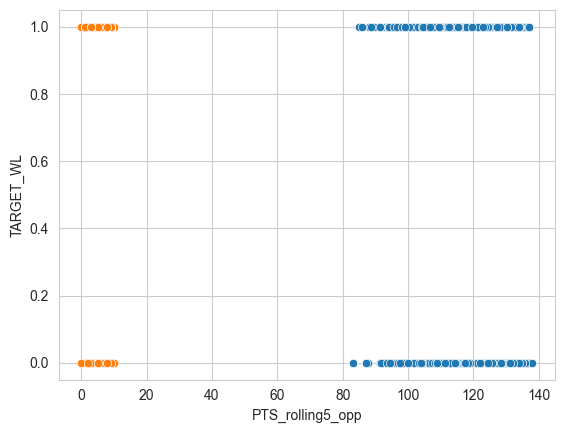

In [31]:
sns.scatterplot(x='PTS_rolling5_opp', y='TARGET_WL', data=df)
sns.scatterplot(x='TEAM_LAST10_WINS_opp', y='TARGET_WL', data=df)

In [44]:
df['GAME_DATE'].min()

Timestamp('2021-10-22 00:00:00')

/var/folders/14/drwtsk3n2wvdsmw2rj7tqh040000gn/T/ipykernel_59842/3145830458.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


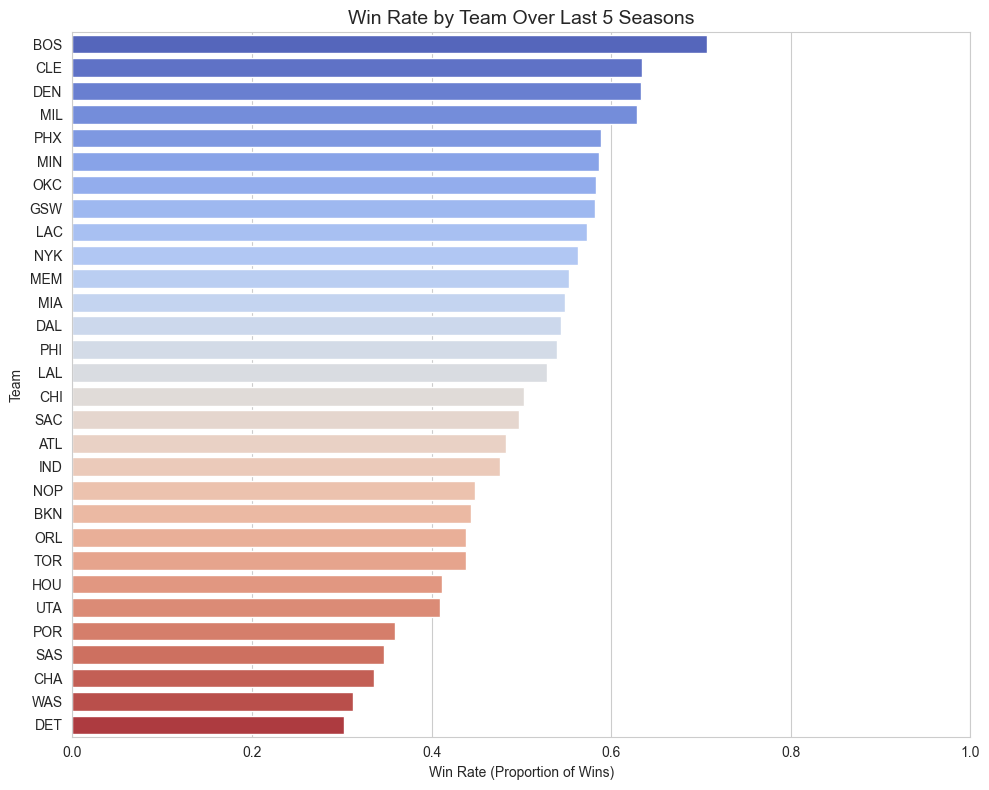

In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- Mapping of Team_ID to Abbreviation ---
team_map = {
    1610612737: 'ATL', 1610612738: 'BOS', 1610612739: 'CLE', 1610612740: 'NOP',
    1610612741: 'CHI', 1610612742: 'DAL', 1610612743: 'DEN', 1610612744: 'GSW',
    1610612745: 'HOU', 1610612746: 'LAC', 1610612747: 'LAL', 1610612748: 'MIA',
    1610612749: 'MIL', 1610612750: 'MIN', 1610612751: 'BKN', 1610612752: 'NYK',
    1610612753: 'ORL', 1610612754: 'IND', 1610612755: 'PHI', 1610612756: 'PHX',
    1610612757: 'POR', 1610612758: 'SAC', 1610612759: 'SAS', 1610612760: 'OKC',
    1610612761: 'TOR', 1610612762: 'UTA', 1610612763: 'MEM', 1610612764: 'WAS',
    1610612765: 'DET', 1610612766: 'CHA'
}

# --- Compute team win rates ---
team_win_rates = (
    df.groupby('Team_ID')['TARGET_WL']
    .mean()
    .rename_axis('Team_ID')
    .reset_index()
)

# --- Add abbreviation labels ---
team_win_rates['Abbreviation'] = team_win_rates['Team_ID'].map(team_map)

# --- Sort by win rate ---
team_win_rates = team_win_rates.sort_values('TARGET_WL', ascending=False)

# --- Plot ---
plt.figure(figsize=(10, 8))
sns.barplot(
    data=team_win_rates,
    x='TARGET_WL',
    y='Abbreviation',
    palette='coolwarm'
)

plt.title("Win Rate by Team Over Last 5 Seasons", fontsize=14)
plt.xlabel("Win Rate (Proportion of Wins)")
plt.ylabel("Team")
plt.xlim(0, 1)
plt.tight_layout()
plt.show()
